In [189]:
import pandas as pd
import numpy as np

## Data load

In [190]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [191]:
categorical_features = ['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location']
features = ['normalized-losses', 'length', 'width', 'height', 'curb-weight', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
target_col = 'price'
cars = cars[features + categorical_features + [target_col]]

cars = cars.replace('?', np.nan)
cars.head(20)

,normalized-losses,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,price
0,NaN,168.8,64.1,48.8,2548,111,5000,21,27,alfa-romero,gas,two,convertible,rwd,front,13495
1,NaN,168.8,64.1,48.8,2548,111,5000,21,27,alfa-romero,gas,two,convertible,rwd,front,16500
2,NaN,171.2,65.5,52.4,2823,154,5000,19,26,alfa-romero,gas,two,hatchback,rwd,front,16500
3,164,176.6,66.2,54.3,2337,102,5500,24,30,audi,gas,four,sedan,fwd,front,13950
4,164,176.6,66.4,54.3,2824,115,5500,18,22,audi,gas,four,sedan,4wd,front,17450
5,NaN,177.3,66.3,53.1,2507,110,5500,19,25,audi,gas,two,sedan,fwd,front,15250
6,158,192.7,71.4,55.7,2844,110,5500,19,25,audi,gas,four,sedan,fwd,front,17710
7,NaN,192.7,71.4,55.7,2954,110,5500,19,25,audi,gas,four,wagon,fwd,front,18920
8,158,192.7,71.4,55.9,3086,140,5500,17,20,audi,gas,four,sedan,fwd,front,23875
9,NaN,178.2,67.9,52.0,3053,160,5500,16,22,audi,gas,two,hatchback,4wd,front,NaN


In [192]:
dict_col_types = {'price' : 'float'}
for c in features:
    dict_col_types[c] = 'float'
for c in categorical_features:
    dict_col_types[c] = 'category'

prepared_cars = cars.astype(dtype=dict_col_types)
prepared_cars.head()

,normalized-losses,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,price
0,NaN,168.8,64.1,48.8,2548.0,111.0,5000.0,21.0,27.0,alfa-romero,gas,two,convertible,rwd,front,13495.0
1,NaN,168.8,64.1,48.8,2548.0,111.0,5000.0,21.0,27.0,alfa-romero,gas,two,convertible,rwd,front,16500.0
2,NaN,171.2,65.5,52.4,2823.0,154.0,5000.0,19.0,26.0,alfa-romero,gas,two,hatchback,rwd,front,16500.0
3,164.0,176.6,66.2,54.3,2337.0,102.0,5500.0,24.0,30.0,audi,gas,four,sedan,fwd,front,13950.0
4,164.0,176.6,66.4,54.3,2824.0,115.0,5500.0,18.0,22.0,audi,gas,four,sedan,4wd,front,17450.0


In [193]:
numeric_cars = pd.get_dummies(prepared_cars)
numeric_cars.isnull().sum()

normalized-losses         41
length                     0
width                      0
height                     0
curb-weight                0
horsepower                 2
peak-rpm                   2
city-mpg                   0
highway-mpg                0
price                      4
make_alfa-romero           0
make_audi                  0
make_bmw                   0
make_chevrolet             0
make_dodge                 0
make_honda                 0
make_isuzu                 0
make_jaguar                0
make_mazda                 0
make_mercedes-benz         0
make_mercury               0
make_mitsubishi            0
make_nissan                0
make_peugot                0
make_plymouth              0
make_porsche               0
make_renault               0
make_saab                  0
make_subaru                0
make_toyota                0
make_volkswagen            0
make_volvo                 0
fuel-type_diesel           0
fuel-type_gas              0
num-of-doors_f

In [194]:
# price is the target, so we will drop all rows with missiong values
numeric_cars.dropna(axis=0, subset=['price'], inplace=True)

# all other will be filled with mean value
numeric_cars.fillna(numeric_cars.mean(), inplace=True)
numeric_cars.isnull().sum()

normalized-losses         0
length                    0
width                     0
height                    0
curb-weight               0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_renault              0
make_saab                 0
make_subaru               0
make_toyota               0
make_volkswagen           0
make_volvo                0
fuel-type_diesel          0
fuel-type_gas             0
num-of-doors_four         0
num-of-doors_two    

#### Normalize all columns to range from 0 to 1 except the target column

In [195]:
price_col = numeric_cars['price']
normalized_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = price_col

normalized_cars.head()

,normalized-losses,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price,...,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,0.298429,0.413433,0.324786,0.083333,0.411171,0.294393,0.346939,0.222222,0.289474,13495.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.298429,0.413433,0.324786,0.083333,0.411171,0.294393,0.346939,0.222222,0.289474,16500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.298429,0.449254,0.444444,0.383333,0.517843,0.495327,0.346939,0.166667,0.263158,16500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.518325,0.529851,0.504274,0.541667,0.329325,0.252336,0.551020,0.305556,0.368421,13950.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.518325,0.529851,0.521368,0.541667,0.518231,0.313084,0.551020,0.138889,0.157895,17450.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Model

In [196]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [207]:
features = list(normalized_cars.columns)
features.remove(target_col)
X = normalized_cars[features]
y = normalized_cars[[target_col]]
# train - 80%, test - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [208]:
def build_model(k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse = mean_squared_error(y_test, predictions)**(1/2)
    return knn, rmse

knn, rmse = build_model()
rmse

2664.1381191734013

### Using Cross Validation

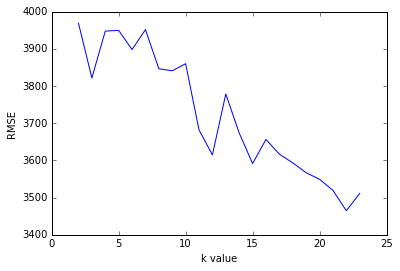

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

def test_cross_validation(k):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, X, y, scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    return avg_rmse

k_tests = dict([(k, test_cross_validation(k)) for k in range(2, 24)])
plt.plot(list(k_tests.keys()), list(k_tests.values()))
plt.xlabel('k value')
plt.ylabel('RMSE')